<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Cryptographie_Permutation_alphabetique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Permutation alphabétique**

Dans ce chapitre, nous allons introduire la notion de **cryptograhie** et découvrir quelques algorithmes de **chiffrement faible** (faciles à déchiffrer).

Le chiffrement est un procédé de cryptographie qui consiste à rendre un document illisible à toute personne ne possédant pas la **clé** de déchiffrement.

Ici, nous allons découvrir le fonctionnement de la **permutation alphabétique** (substitution mono-alphabétique). Cet algorithme emploie un chiffrement par substition, comme **ROT13** et le **code de César**.

Ici, l'idée est d'affecter un lettre de l'alphabet à chaque lettre de l'alphabet, et de remplacer chaque lettre d'un texte par la lettre corrspondante.

Voici un exemple de table de correspondance :

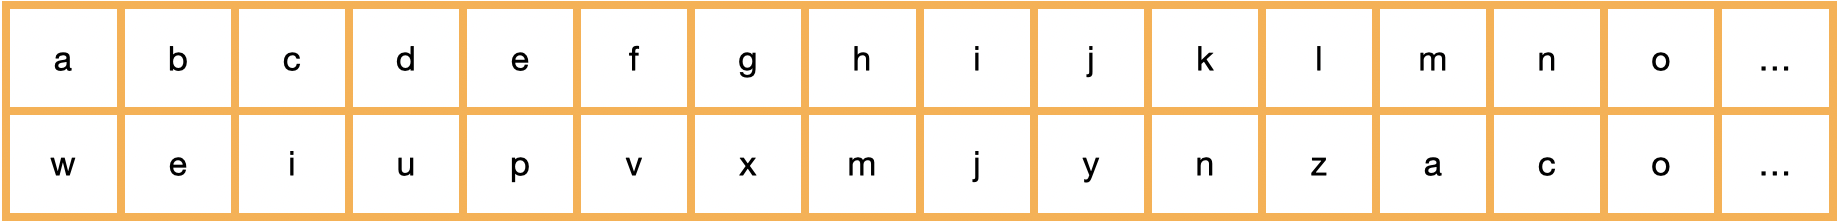

Ainsi, le texte 'hello' devient 'mpzzo'. 

Créons à notre tour un table de correspondance. Commençons par importer les modules nécessaires. 

In [ ]:
from string import ascii_lowercase, ascii_uppercase
import random as rd
print(ascii_lowercase)
print(ascii_uppercase)

abcdefghijklmnopqrstuvwxyz


En cas d'erreur sur ce bloc d'instructions, lancez l'installation du module string, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user string
!{sys.executable} -m pip install --user random

Mélangeons notre dictionnaire :

In [ ]:
lower = ascii_lowercase
val = ''.join(rd.sample(lower,len(lower)))
print(val)

weiupvxmjynzacobkdgrsftqlh


Créons maintenant une table de correspondance :

In [ ]:
table = dict()
for i in range(26):
  table[lower[i]] = val[i]
print(table)

{'a': 'w', 'b': 'e', 'c': 'i', 'd': 'u', 'e': 'p', 'f': 'v', 'g': 'x', 'h': 'm', 'i': 'j', 'j': 'y', 'k': 'n', 'l': 'z', 'm': 'a', 'n': 'c', 'o': 'o', 'p': 'b', 'q': 'k', 'r': 'd', 's': 'g', 't': 'r', 'u': 's', 'v': 'f', 'w': 't', 'x': 'q', 'y': 'l', 'z': 'h'}


Répétons l'opération avec les majuscules.

In [ ]:
upper = ascii_uppercase
for i in range(26):
  table[upper[i]] = val[i].upper()
print(table)

{'a': 'w', 'b': 'e', 'c': 'i', 'd': 'u', 'e': 'p', 'f': 'v', 'g': 'x', 'h': 'm', 'i': 'j', 'j': 'y', 'k': 'n', 'l': 'z', 'm': 'a', 'n': 'c', 'o': 'o', 'p': 'b', 'q': 'k', 'r': 'd', 's': 'g', 't': 'r', 'u': 's', 'v': 'f', 'w': 't', 'x': 'q', 'y': 'l', 'z': 'h', 'A': 'W', 'B': 'E', 'C': 'I', 'D': 'U', 'E': 'P', 'F': 'V', 'G': 'X', 'H': 'M', 'I': 'J', 'J': 'Y', 'K': 'N', 'L': 'Z', 'M': 'A', 'N': 'C', 'O': 'O', 'P': 'B', 'Q': 'K', 'R': 'D', 'S': 'G', 'T': 'R', 'U': 'S', 'V': 'F', 'W': 'T', 'X': 'Q', 'Y': 'L', 'Z': 'H'}


Réalisons maintenant la fonction de chiffrement qui utilisera cette table de codage :

In [ ]:
def code(x, table):
  """
  Retourne x chiffré par la table de correspondance table
  """
  code=""
  for i in x:
    if i in lower+upper:
      code+=table[i]
    else:
      code+=i
  return code

Codons maitenant un texte grâce à cette table de correspondance.

In [ ]:
code = code('Bonjour !',table)
print(code)

Eocyosd !


Pour décoder, cela nécessite de créer une seconde fonction :


In [ ]:
def decode(x, table):
  """
  Retourne x décodé par la table de correspondance table
  """
  code=""
  for i in x:
    if i in lower+upper:
      for j in table:
        if table[j]==i:
          code+=j
    else:
      code+=i
  return code

In [ ]:
decode = decode(code,table)
print(decode)

Bonjour !


Cette technique peut sembler robuste comparée au code de César puisque le nombre de combinaisons possibles n'est pas de 26 mais de :


*   26 pour le caractère correspondant à la lettre 'a'
*   25 pour le caractère correspondant à la lettre 'b'
*   24 pour le caractère correspondant à la lettre 'c'
*   ...

Soit, au total, 26! combinaisons (4 x 10^26), ce qu'il est très difficile à trouver par force brute.

Cependant, on peut décoder facilement un message codé de cette manière par analyse de la fréquence de lettres dans la langue utilisée pour le texte à décoder : https://www.apprendre-en-ligne.net/crypto/stat/francais.html.

Si le texte à décoder est suffisament long, on peut facilement déterminer à quelle lettre correspond le 'e' qui est la lettre que l'on retrouve le plus fréquement en langue Française. Nous pouvons aussi travailler sur des enchainements lettres comme 'es' ou 'ent' qui sont très fréquents, et petit à petit découvrir la table de conversion.

